# **🌱 EPOCH 비기너 세션 Final Test 🔥**





---



## **1️⃣ 'Sleep_health_and_lifestyle_dataset.csv' 파일을 불러와 수면 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/에폭/Sleep_health_and_lifestyle_dataset.csv')
df= pd.DataFrame(data)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### (1) 성별에 따른 평균 수면 시간('Sleep Duration')을 출력하세요.

In [3]:
df.groupby('Gender')['Sleep Duration'].mean()

,Sleep Duration
Gender,
Female,7.229730
Male,7.036508


### (2) 스트레스 수준('Stress Level')이 3 이상인 사람들의 수면 질('Quality of Sleep') 평균을 구하세요.

In [4]:
big_stress=df[df['Stress Level']>=3]
big_stress.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
big_stress['Quality of Sleep'].mean()

np.float64(7.31283422459893)

### (3) 아래와 같은 수면 데이터에 대한 네 가지 그래프를 그리세요.
* colors = ['gold', 'gray','darkgray', 'silver', 'lightgray', 'whitesmoke'] & 'coral' & 'purple' & 'green'

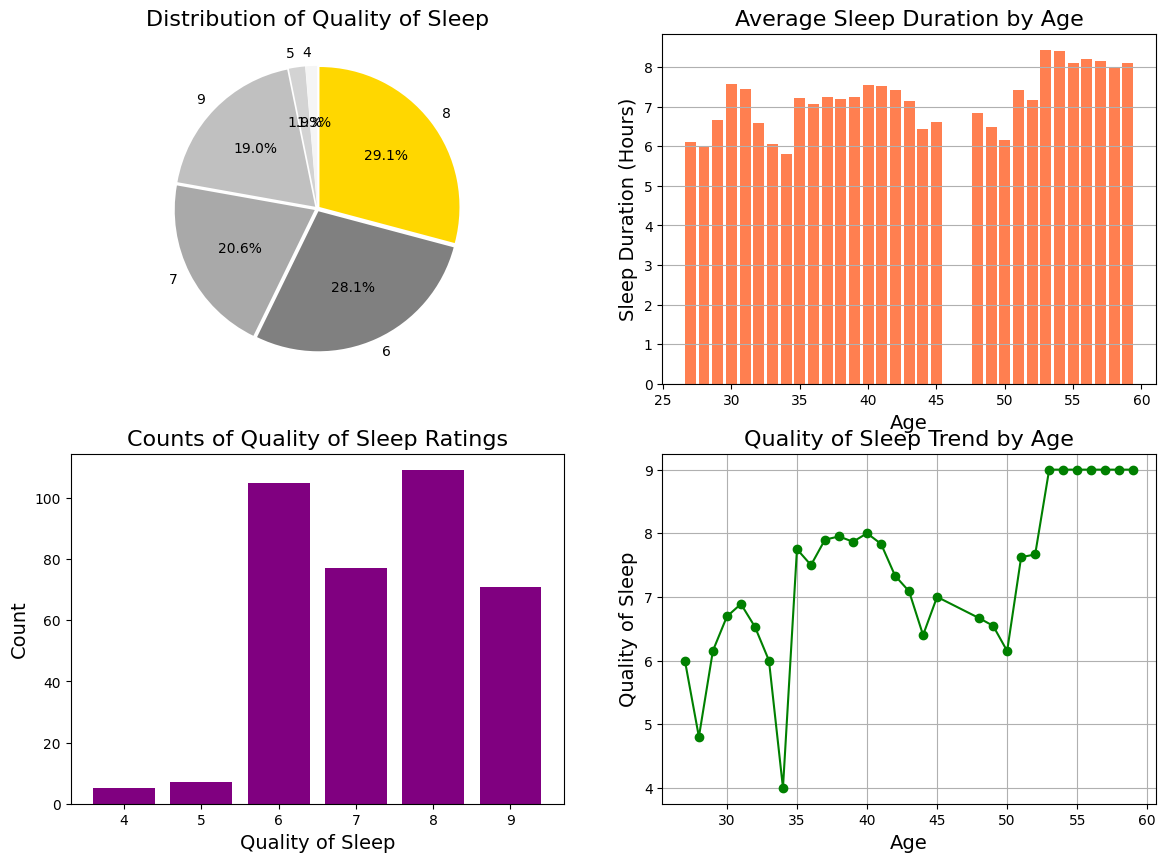

In [13]:
import matplotlib.pyplot as plt

ratio=df['Quality of Sleep'].value_counts(normalize=True).reset_index()
ratio

,Quality of Sleep,proportion
0,8,0.291444
1,6,0.280749
2,7,0.205882
3,9,0.189840
4,5,0.018717
5,4,0.013369


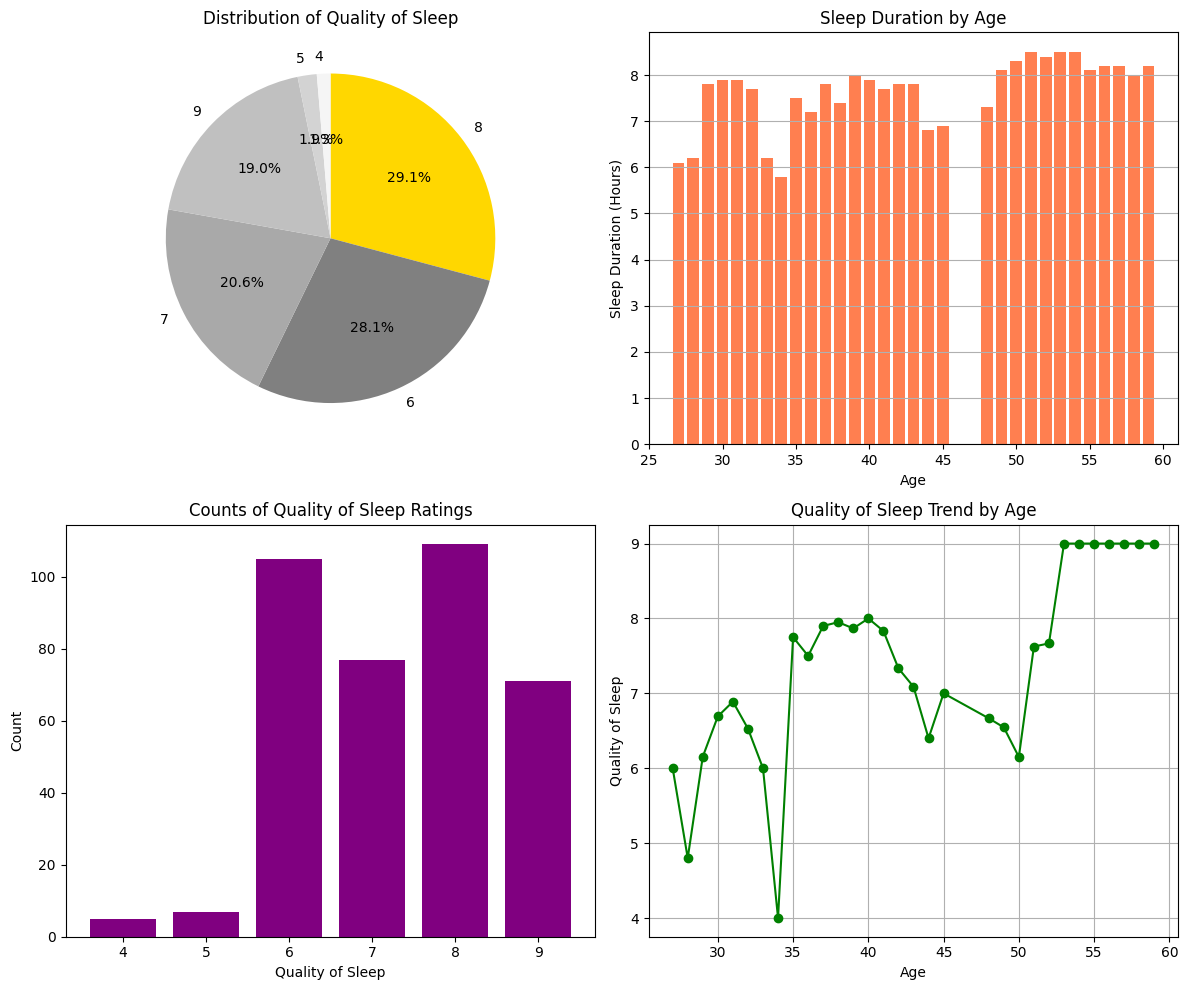

In [45]:
import numpy as np
colors = ['gold', 'gray','darkgray', 'silver', 'lightgray', 'whitesmoke']

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.pie(x=ratio['proportion'],labels=ratio['Quality of Sleep'],autopct='%.1f%%',startangle=90,counterclock=False,colors=colors)
plt.title('Distribution of Quality of Sleep')

plt.subplot(2,2,2)
plt.grid(True,axis='y')
plt.bar(x=df['Age'], height=df['Sleep Duration'], color='coral')
plt.title('Sleep Duration by Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (Hours)')

plt.subplot(2,2,3)
x=np.arange(6)
sleep = df.groupby('Quality of Sleep')['Sleep Duration'].count().reset_index()
plt.bar(x,sleep['Sleep Duration'],color='purple')
plt.xticks(x,sleep['Quality of Sleep'])
plt.title('Counts of Quality of Sleep Ratings')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')


plt.subplot(2,2,4)
age_qual=df.groupby('Age')['Quality of Sleep'].mean().reset_index()
plt.plot(age_qual['Age'],age_qual['Quality of Sleep'],marker='o',color='green')
plt.grid()
plt.title('Quality of Sleep Trend by Age')
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')


plt.tight_layout()
plt.show()

In [42]:
age_qual=df.groupby('Age')['Quality of Sleep'].mean()
age_qual.head()

,Quality of Sleep
Age,
27,6.000000
28,4.800000
29,6.153846
30,6.692308
31,6.888889


## **2️⃣‘calendar.csv' 파일과 'listings.csv' 파일을 불러와 Airbnb 예약 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [33]:
data= pd.read_csv('/content/drive/MyDrive/에폭/calendar.csv')
df1= pd.DataFrame(data)
df1.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2024-06-24,f,$90.00,NaN,30.0,1125.0
1,6606,2024-06-25,f,$90.00,NaN,30.0,1125.0
2,6606,2024-06-26,f,$90.00,NaN,30.0,1125.0
3,6606,2024-06-27,f,$90.00,NaN,30.0,1125.0
4,6606,2024-06-28,f,$90.00,NaN,30.0,1125.0


In [38]:
data= pd.read_csv('/content/drive/MyDrive/에폭/listings.csv')
df2= pd.DataFrame(data)
df2.head()

,listing_id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Unnamed: 12
0,6606.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
1,9419.0,Glorious sun room w/ memory foambed,30559,Angielena,Private room,76,2,196,10.0,337,15,Exempt,NaN
2,9531.0,The Adorable Sweet Orange Craftsman,31481,Cassie,Entire home/apt,189,3,97,2.0,133,23,STR-OPLI-19-002182,NaN
3,9534.0,The Coolest Tangerine Dream MIL!,31481,Cassie,Entire home/apt,125,2,77,2.0,1,2,STR-OPLI-19-002182,NaN
4,9596.0,"the down home , spacious, central and fab!",14942,Joyce,Entire home/apt,NaN,30,96,2.0,16,0,STR -OPLI-19-002622,NaN


### (1) 두 데이터셋을 'listing_id'를 기준으로 병합하여 숙소가 예약이 가능한 상태인 날짜의 수를 세어 숙소별로 출력하세요.
* Hint: 'availability_365'가 0보다 크면 예약 가능한 상태

In [39]:
merged = df1.merge(df2,left_on='listing_id',right_on='listing_id',how='inner')
merged.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights,name,host_id,host_name,room_type,price_y,minimum_nights_y,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Unnamed: 12
0,6606,2024-06-24,f,$90.00,NaN,30.0,1125.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
1,6606,2024-06-25,f,$90.00,NaN,30.0,1125.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
2,6606,2024-06-26,f,$90.00,NaN,30.0,1125.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
3,6606,2024-06-27,f,$90.00,NaN,30.0,1125.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN
4,6606,2024-06-28,f,$90.00,NaN,30.0,1125.0,"Fab, private seattle urban cottage!",14942,Joyce,Entire home/apt,99,30,160,2.0,147,1,str-opli-19-002622,NaN


In [43]:
merged = pd.merge(df1, df2, on='listing_id')
merged[merged['available'] == 't'].groupby('listing_id')['listing_id'].count()

,listing_id
listing_id,
6606,147
9419,337
9531,133
9534,1
9596,16
...,...
54385010,102
54396923,77
54396956,65
